In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [17]:
X

array([13.,  2., 14., 23., 13.,  1., 18., 10., 26.,  3.,  3., 21.,  7.,
       22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10., 21.,
        5.,  6., 13., 13.])

In [18]:
Y

array([33., 16., 32., 51., 27., 16., 34., 17., 29., 15., 15., 32., 22.,
       37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27., 37.,
       17., 18., 25., 23.])

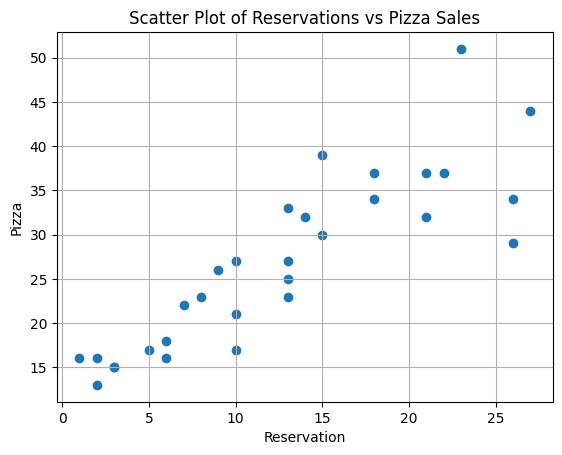

In [6]:
# Create the scatter plot
plt.scatter(X, Y)
plt.xlabel('Reservation')
plt.ylabel('Pizza')
plt.title('Scatter Plot of Reservations vs Pizza Sales')
plt.grid(True)
plt.show()

In [7]:
def predict(X, w): 
  return X * w

In [8]:
def loss(X, Y, w):
  return np.average((predict(X, w) - Y) ** 2)

In [9]:
def train(X, Y, iterations, lr): 
  w = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w)
    print("Iteration %4d => Loss: %.6f" % (i, current_loss))
    
    if loss(X, Y, w + lr) < current_loss: 
      w += lr
    elif loss(X, Y, w - lr) < current_loss: 
      w -= lr
    else:
      return w
      
  raise Exception("Couldn't converge within %d iterations" % iterations)

In [16]:
# Train the system
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

In [19]:
# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Prediction: x=20 => y=36.80


In [20]:
def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        if i % 300 == 0:
            print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss: # Updating weight
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss: # Updating weight
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss: # Updating bias
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss: # Updating bias
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)



In [21]:
# Train the system
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))

Iteration    0 => Loss: 812.866667
Iteration  300 => Loss: 61.714587
Iteration  600 => Loss: 45.581253
Iteration  900 => Loss: 33.776567
Iteration 1200 => Loss: 26.229313
Iteration 1500 => Loss: 22.988587

w=1.100, b=12.930


In [22]:
# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Prediction: x=20 => y=34.93
